In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [166]:
x,y=make_regression(n_features=1,n_samples=100,noise=20,random_state=42)

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [168]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [169]:
y_pred=lr.predict(x_test)

In [170]:
r2_score(y_test,y_pred)

0.8094169429876404

In [171]:
print(lr.coef_)
print(lr.intercept_)

[46.92895541]
-0.726865182899374


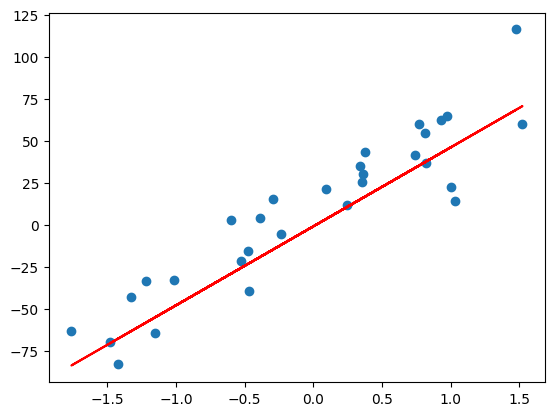

In [173]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red")

In [174]:
class GDreg():

    def __init__(self,m,b,lr,epochs):
        self.m=m
        self.b=b
        self.lr=lr
        self.epochs=epochs

    def fitmodel(self,X,Y):
        for i in range(self.epochs):
            slope_loss_b= -2 * np.sum(Y - self.m * X.ravel() - self.b)
            slope_loss_m= -2 * np.sum((Y - self.m * X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * slope_loss_b)
            self.m = self.m - (self.lr * slope_loss_m)

        print(self.b,self.m)

    def predict(self,X):
        
        return self.m * X +self.b

In [175]:
gd=GDreg(100,0,0.01,20)

In [176]:
gd.fitmodel(x_train,y_train)

-0.7268914936446785 46.92896957065036


In [177]:
y_gd_pred=gd.predict(x_test)

In [178]:
r2_score(y_gd_pred,y_test)

0.7810404998570645

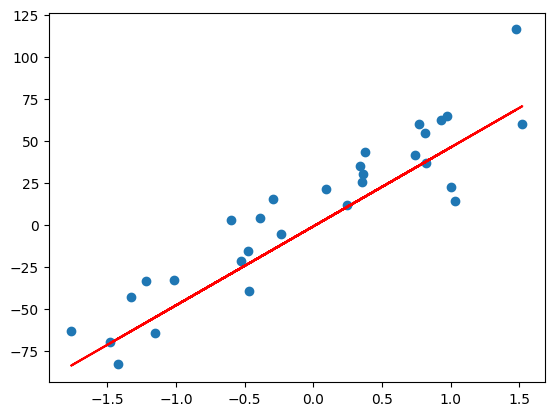

In [179]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_gd_pred,color="red")